In [6]:
import os
import torch
import torchvision
import torch.nn as nn
import json
import os
ROOT_DIR = os.path.abspath(".")
import shutil
import numpy as np
import random
from random import seed
from random import randint
import skimage.io
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
import utilsTACO
import visualize

COCODataset = "./data/COCO"
YOLODataset = "./data/YOLO"


In [9]:
def log(text, array=None):
    """Prints a text message. And, optionally, if a Numpy array is provided it
    prints it's shape, min, and max values.
    """
    if array is not None:
        text = text.ljust(25)
        text += ("shape: {:20}  min: {:10.5f}  max: {:10.5f}  {}".format(
            str(array.shape),
            array.min() if array.size else "",
            array.max() if array.size else "",
            array.dtype))
    print(text)

# Convert COCO to YOLO format

In [7]:
import csv
import dataset

# Load class map - these tables map the original TACO classes to your desired class system
# and allow you to discard classes that you don't want to include.
class_map = {}
with open("./taco_config/map_1.csv") as csvfile:
    reader = csv.reader(csvfile)
    class_map = {row[0]:row[1] for row in reader}

# Load full dataset or a subset
TACO_DIR = COCODataset
round = None # Split number: If None, loads full dataset else if int > 0 selects split no 
subset = "train" # Used only when round !=None, Options: ('train','val','test') to select respective subset
dataset = dataset.Taco()
taco = dataset.load_taco(TACO_DIR, round, subset, class_map=class_map, return_taco=True)

# Must call before using the dataset
dataset.prepare()

print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))


creating index...
index created!
Number of images used: 1500
Class Count: 2
  0. BG                                                
  1. Litter                                            


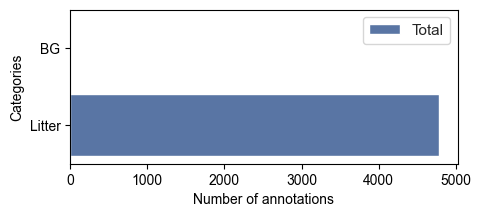

In [7]:
import seaborn as sns
import pandas as pd

# Count annotations
cat_histogram = np.zeros(dataset.num_classes,dtype=int)
class_names = []
for i, info in enumerate(dataset.class_info):
    ann_per_cat = taco.getAnnIds(catIds=i, iscrowd=None)
    cat_histogram[i] = len(ann_per_cat)
    class_names.append(info['name'])

# Initialize the matplotlib figure
_, ax = plt.subplots(figsize=(5,1*dataset.num_classes))

# Convert to DataFrame
d ={'Categories': class_names, 'Number of annotations': cat_histogram}
df = pd.DataFrame(d)
df = df.sort_values('Number of annotations')

# Plot the histogram
sns.set_color_codes("pastel")
sns.set(style="whitegrid")
plot_1 = sns.barplot(x="Number of annotations", y="Categories", data=df,
            label="Total", color="b", orient='h')

fig = plot_1.get_figure()

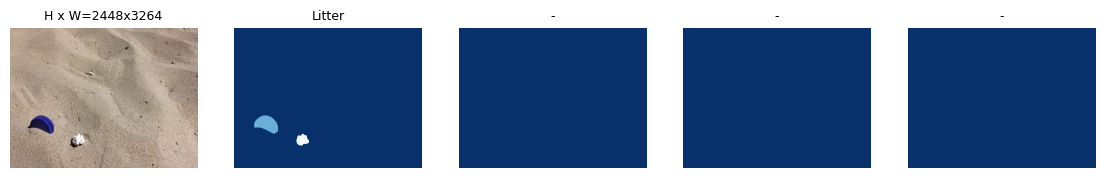

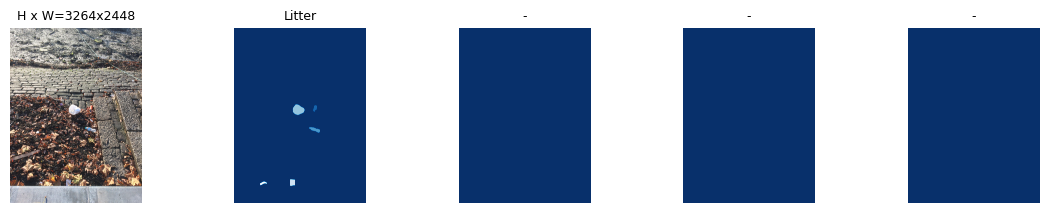

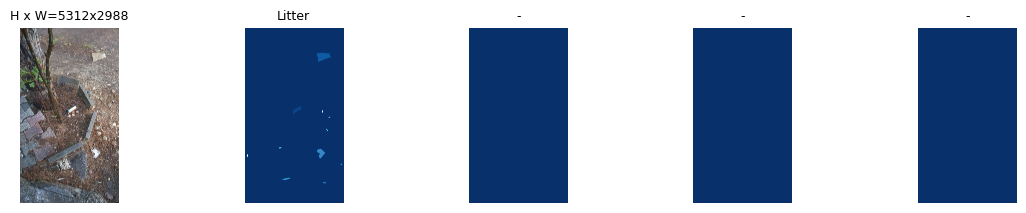

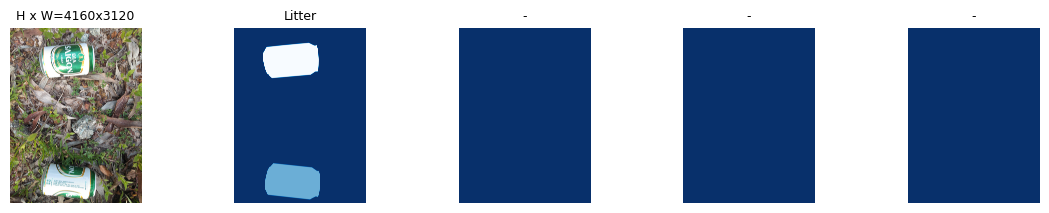

In [4]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

[1 1]
image_id  1033 


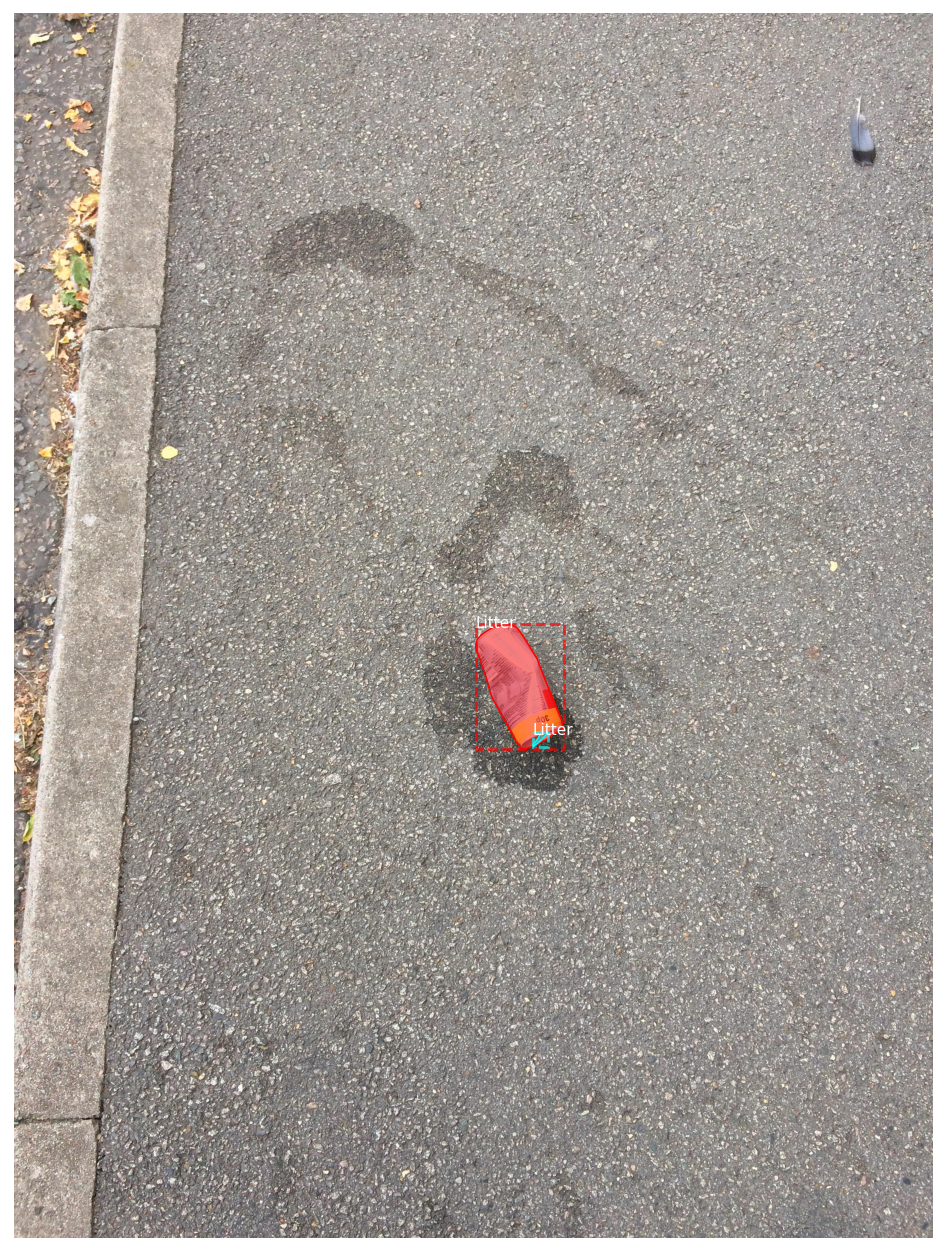

In [8]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
print(class_ids)
# Compute Bounding box
bbox = utilsTACO.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
#log("image", image)
# log("mask", mask)
# log("class_ids", class_ids)
# log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [12]:
bbox

array([[1628, 1232, 1960, 1466],
       [1915, 1384, 1954, 1425]], dtype=int32)

In [9]:
dataset.load_ann(image_id)

[{'id': 3080,
  'image_id': 1033,
  'category_id': 1,
  'segmentation': [[1432.0,
    1814.0,
    1461.0,
    1885.0,
    1462.0,
    1896.0,
    1464.0,
    1898.0,
    1466.0,
    1904.0,
    1452.0,
    1913.0,
    1439.0,
    1921.0,
    1425.0,
    1932.0,
    1417.0,
    1937.0,
    1410.0,
    1940.0,
    1402.0,
    1945.0,
    1396.0,
    1948.0,
    1388.0,
    1955.0,
    1382.0,
    1955.0,
    1377.0,
    1956.0,
    1367.0,
    1959.0,
    1358.0,
    1960.0,
    1351.0,
    1958.0,
    1349.0,
    1951.0,
    1347.0,
    1948.0,
    1342.0,
    1945.0,
    1295.0,
    1859.0,
    1281.0,
    1834.0,
    1276.0,
    1823.0,
    1271.0,
    1811.0,
    1261.0,
    1775.0,
    1243.0,
    1721.0,
    1234.0,
    1696.0,
    1232.0,
    1687.0,
    1234.0,
    1678.0,
    1235.0,
    1670.0,
    1247.0,
    1656.0,
    1263.0,
    1645.0,
    1276.0,
    1637.0,
    1292.0,
    1632.0,
    1308.0,
    1629.0,
    1324.0,
    1628.0,
    1342.0,
    1637.0,
    1359.0,
    16

In [10]:
image_id

1033